In [1]:
import numpy as np
from numpy.linalg import inv
from scipy import linalg


In [2]:
def min_energy(A,b,w):
    m,n = A.shape
    
    if m!= n:
        b = A.T@b
        A = A.T@A
    w = np.identity(A.shape[0])
    m = inv((w.T@w))
    x = m@A.T@inv(A@m@A.T)@b

    return x

In [24]:
def IRLS(A, b):
    w = np.identity(A.shape[0])

    for i in range(10000):
        if i> 0:
            x_old = x

        x = min_energy(A,b,w)
        w = np.maximum(0.0001,abs(x))
        w = 1/np.sqrt(w)
        w = np.diagflat(w)

        if i> 0:
            if abs((x-x_old).all()) < 0.00001:
                print("iter", i)
                break

    return x 

In [25]:
A = np.array([[2.0,1.0],[5.0,7.0]])
b = np.array([11.0,13.0])

IRLS(A,b)

iter 1


array([ 7.11111111, -3.22222222])

In [26]:
A = np.array([[1.  , 0.18, 0.89],
       [1.  , 1.  , 0.26],
       [1.  , 0.92, 0.11],
       [1.  , 0.07, 0.37],
       [1.  , 0.85, 0.16],
       [1.  , 0.99, 0.41],
       [1.  , 0.87, 0.47]])

b = np.array([109.85,155.72,137.66, 76.17,139.75,162.6,151.77])

IRLS(A,b)


iter 1


array([52.41149905, 90.69331739, 46.46296549])

In [27]:
A = np.random.uniform(low=-1, high=2, size=(60,100))
x =  np.zeros(100)
x[3]=100
x[5]=400
x[40] =40
x[12] =700

b = A @ x

In [28]:
x_ = IRLS(A,b)

iter 1


<AxesSubplot:>

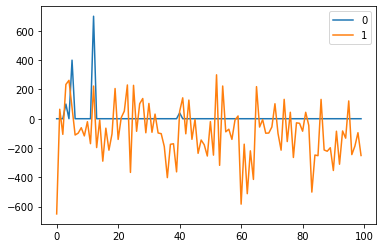

In [29]:
import pandas as pd
df = pd.DataFrame([x,x_])
df.T.plot()